# Metropolis Algorithm Implementation

## 1. Initialization

- **Starting State**: The initial vector is simply $\vec{x} | x_{i} = 2 $.

## 2. Proposal Mechanism

- **Candidate Generation**: In each iteration, two random indices \( i, j \) within the 12 components are selected. One component decrease by 1 and the other increase by 1, maintaining the total sum at 24.

## 3. Acceptance Probability

- **Probability Calculation**: The acceptance probability is computed based on the target distribution ratio:

$$
  A(\mathbf{x}', \mathbf{x}) = \min\left(1, \frac{p(\mathbf{x}')}{p(\mathbf{x})}\right)
$$

  where $ p(\mathbf{x}) = \prod_{i=1}^{12} x_i $.

The process repeats for 2 and 3 until maximum iterations.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


np.random.seed(42)  # for reproducibility

def p(x):
    """ target probability function """
    return np.prod(x)  # Product of all components

# Metropolis sampler
def metropolis(n_steps):
    """
    metropolis algorithm implementation
    """
    x = np.array([2]*12)  # initial distribution
    Ms = np.zeros(n_steps)  # To store M values
    samples = np.zeros((n_steps, 12))  # To store values of vector x (size: n x 12)

    for i in range(n_steps):
        idx1, idx2 = np.random.choice(12, 2, replace=False)  # Choose two indices at random
        if x[idx1] > 0:  # Ensure there's something to transfer
            x_new = np.copy(x)
            x_new[idx1] -= 1
            x_new[idx2] += 1
            # Compute acceptance probability
            A = min(1, p(x_new) / p(x))
            # Accept or reject
            if np.random.rand() < A:
                x = x_new

        Ms[i] = np.max(x) - np.min(x)  # Compute and store M
        samples[i, :] = x  # Store the current state vector

    return Ms, samples



Sorted M counts:
M = 2.0: Frequency = 2347
M = 3.0: Frequency = 9005
M = 4.0: Frequency = 5785
M = 5.0: Frequency = 1968
M = 6.0: Frequency = 681
M = 7.0: Frequency = 180
M = 8.0: Frequency = 34


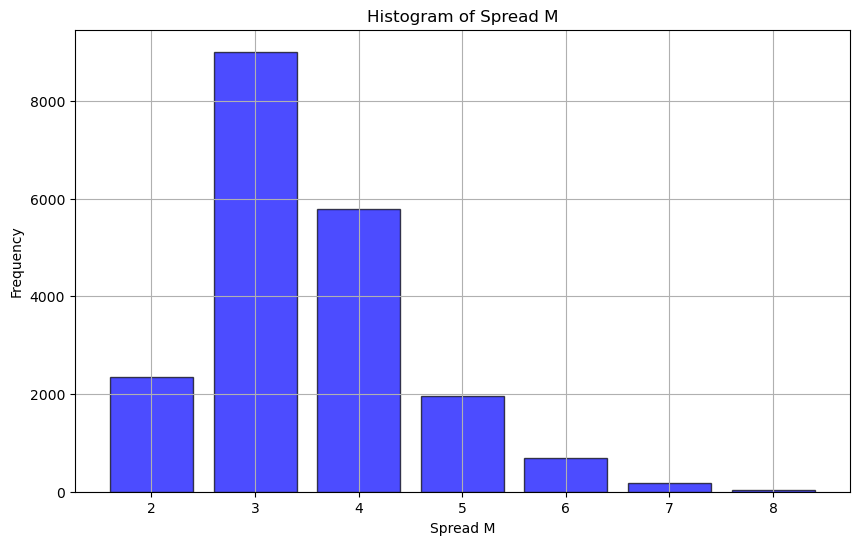

In [27]:
n_steps = int(2e4)
Ms, samples = metropolis(n_steps)

# Count occurrences of each spread M
M_counts = Counter(Ms)

# Sorting the counts to ensure the plot is ordered
sorted_Ms = sorted(M_counts.items())  # Returns a list of tuples (M_value, count)
M_values, frequencies = zip(*sorted_Ms)  # Unpack the list of tuples into two tuples

print("Sorted M counts:")
for M_value, freq in sorted_Ms:
    print(f"M = {M_value}: Frequency = {freq}")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(M_values, frequencies, align='center', alpha=0.7, color='b', edgecolor='k')
plt.title('Histogram of Spread M')
plt.xlabel('Spread M')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(int(min(M_values)), int(max(M_values)) + 1))  # Set x-ticks to show all M values
plt.show()

Sorted M counts:
M = 2.0: Frequency = 24040
M = 3.0: Frequency = 90816
M = 4.0: Frequency = 56333
M = 5.0: Frequency = 20459
M = 6.0: Frequency = 6170
M = 7.0: Frequency = 1686
M = 8.0: Frequency = 386
M = 9.0: Frequency = 110


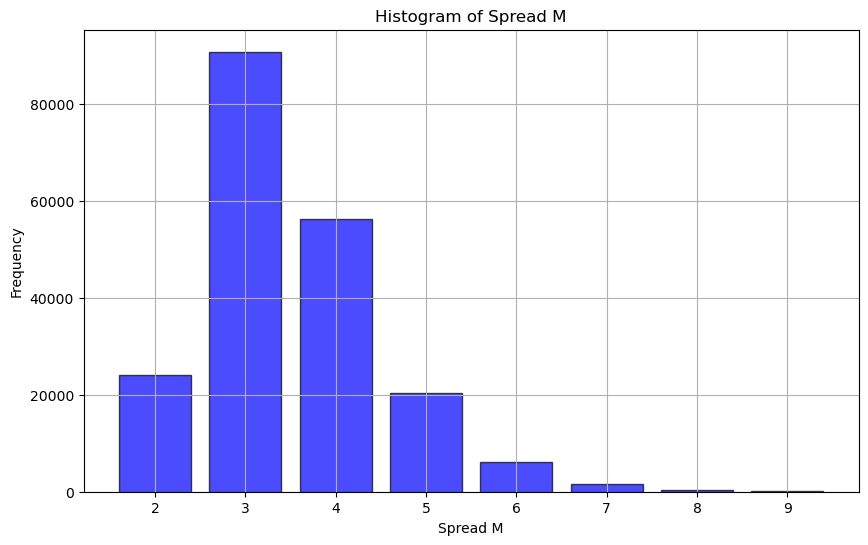

In [28]:
n_steps = int(2e5)
Ms, samples = metropolis(n_steps)

# Count occurrences of each spread M
M_counts = Counter(Ms)

# Sorting the counts to ensure the plot is ordered
sorted_Ms = sorted(M_counts.items())  # Returns a list of tuples (M_value, count)
M_values, frequencies = zip(*sorted_Ms)  # Unpack the list of tuples into two tuples

print("Sorted M counts:")
for M_value, freq in sorted_Ms:
    print(f"M = {M_value}: Frequency = {freq}")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(M_values, frequencies, align='center', alpha=0.7, color='b', edgecolor='k')
plt.title('Histogram of Spread M')
plt.xlabel('Spread M')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(int(min(M_values)), int(max(M_values)) + 1))  # Set x-ticks to show all M values
plt.show()

Sorted M counts:
M = 0.0: Frequency = 8
M = 2.0: Frequency = 240815
M = 3.0: Frequency = 905193
M = 4.0: Frequency = 565641
M = 5.0: Frequency = 207006
M = 6.0: Frequency = 61505
M = 7.0: Frequency = 15628
M = 8.0: Frequency = 3658
M = 9.0: Frequency = 518
M = 10.0: Frequency = 28


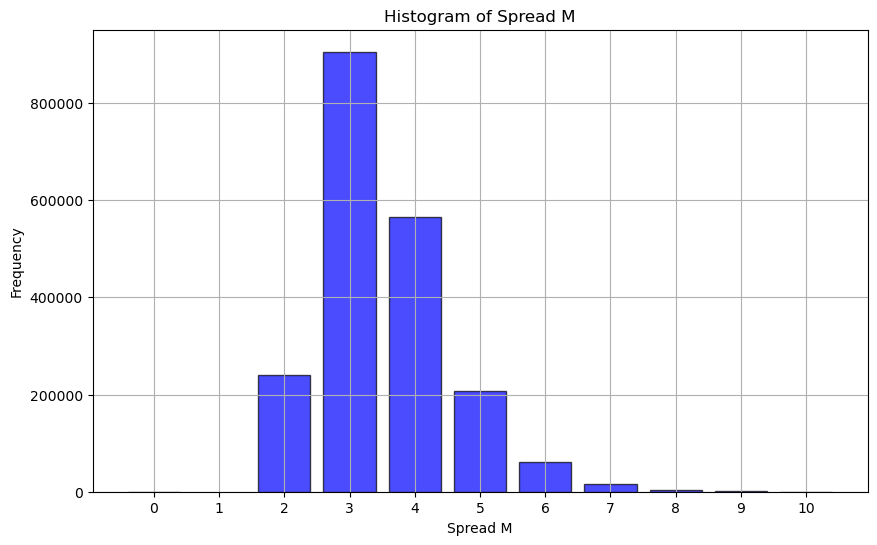

In [29]:
n_steps = int(2e6)
Ms, samples = metropolis(n_steps)

# Count occurrences of each spread M
M_counts = Counter(Ms)

# Sorting the counts to ensure the plot is ordered
sorted_Ms = sorted(M_counts.items())  # Returns a list of tuples (M_value, count)
M_values, frequencies = zip(*sorted_Ms)  # Unpack the list of tuples into two tuples

print("Sorted M counts:")
for M_value, freq in sorted_Ms:
    print(f"M = {M_value}: Frequency = {freq}")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(M_values, frequencies, align='center', alpha=0.7, color='b', edgecolor='k')
plt.title('Histogram of Spread M')
plt.xlabel('Spread M')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(int(min(M_values)), int(max(M_values)) + 1))  # Set x-ticks to show all M values
plt.show()

Sorted M counts:
M = 0.0: Frequency = 112
M = 2.0: Frequency = 2419245
M = 3.0: Frequency = 9117683
M = 4.0: Frequency = 5657131
M = 5.0: Frequency = 2023891
M = 6.0: Frequency = 592656
M = 7.0: Frequency = 150759
M = 8.0: Frequency = 32041
M = 9.0: Frequency = 5502
M = 10.0: Frequency = 831
M = 11.0: Frequency = 149


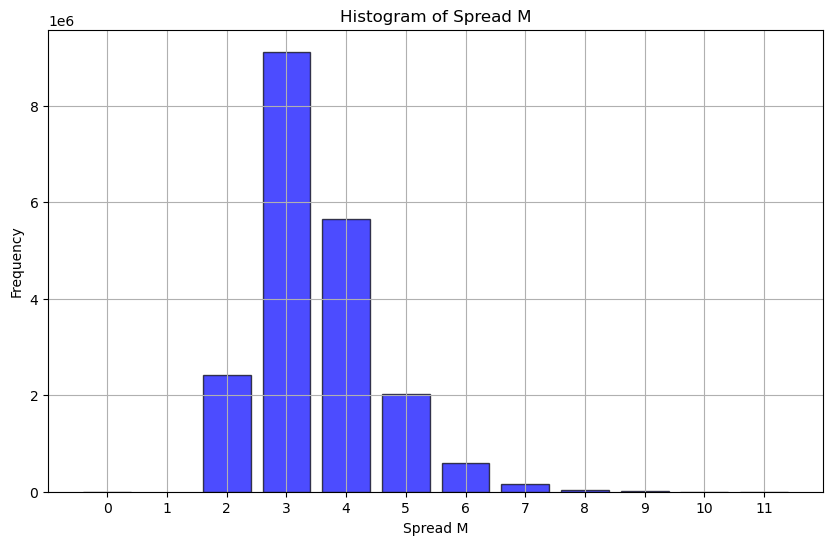

In [30]:
n_steps = int(2e7)
Ms, samples = metropolis(n_steps)

# Count occurrences of each spread M
M_counts = Counter(Ms)

# Sorting the counts to ensure the plot is ordered
sorted_Ms = sorted(M_counts.items())  # Returns a list of tuples (M_value, count)
M_values, frequencies = zip(*sorted_Ms)  # Unpack the list of tuples into two tuples

print("Sorted M counts:")
for M_value, freq in sorted_Ms:
    print(f"M = {M_value}: Frequency = {freq}")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(M_values, frequencies, align='center', alpha=0.7, color='b', edgecolor='k')
plt.title('Histogram of Spread M')
plt.xlabel('Spread M')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(int(min(M_values)), int(max(M_values)) + 1))  # Set x-ticks to show all M values
plt.show()

### Results

The most probable M is apparently 3 here. At $n=20,000$, we have the following occurrences:

Sorted M counts:|
M = 2.0: Frequency = 2347
M = 3.0: Frequency = 9005
M = 4.0: Frequency = 5785
M = 5.0: Frequency = 1968
M = 6.0: Frequency = 681
M = 7.0: Frequency = 180
M = 8.0: Frequency = 34